# Previs√£o de Churn de Clientes - Telecom X - Parte 2
Este notebook cont√©m um pipeline completo para prever a evas√£o (churn) de clientes da empresa fict√≠cia Telecom X. O objetivo √© identificar clientes com alta probabilidade de cancelar seus servi√ßos, permitindo a implementa√ß√£o de estrat√©gias proativas de reten√ß√£o.

## Sum√°rio
1.  Carregamento dos Dados
2.  Limpeza Inicial dos Dados
3.  An√°lise Explorat√≥ria de Dados (EDA)
4.  Pr√©-processamento dos Dados
5.  An√°lise de Correla√ß√£o
6.  Divis√£o Treino/Teste
7.  Treinamento de Modelos
8.  Avalia√ß√£o dos Modelos
9.  Interpreta√ß√£o das Vari√°veis
10. Conclus√£o Estrat√©gica


## 1. Carregamento dos Dados
Nesta se√ß√£o, carregaremos o dataset `df_limpo.csv` e faremos uma inspe√ß√£o inicial para entender sua estrutura e conte√∫do.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Carregar o dataset
df = pd.read_csv('df_limpo.csv')

# Exibir as primeiras linhas
print("Primeiras 5 linhas do dataset:")
print(df.head())

# Exibir as dimens√µes do dataset
print("\nDimens√µes do dataset (linhas, colunas):", df.shape)

# Informa√ß√µes gerais sobre o dataset
print("\nInforma√ß√µes gerais do dataset:")
print(df.info())

# Verificar tipos de dados
print("\nTipos de dados:")
print(df.dtypes)

Primeiras 5 linhas do dataset:
   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

 

## 2. Limpeza Inicial dos Dados
Aqui, removeremos colunas que n√£o contribuem para a previs√£o de churn, como identificadores de cliente, e trataremos valores ausentes ou inconsistentes, se houver.

In [2]:
# Verificar nomes das colunas
print("Colunas do dataset:")
print(df.columns.tolist())

# Remover colunas sem valor preditivo (ex: customerID)
# Vamos verificar se existe uma coluna de ID
id_columns = [col for col in df.columns if col.lower() in ('customerid', 'id')]
if id_columns:
    df = df.drop(id_columns, axis=1)
    print(f"Colunas removidas: {id_columns}")
else:
    print("Nenhuma coluna de ID encontrada.")

# Verificar e tratar valores ausentes
print("\nValores ausentes por coluna:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Verificar valores √∫nicos na coluna Churn
if 'Churn' in df.columns:
    print("\nValores √∫nicos na coluna Churn:")
    print(df['Churn'].value_counts())
else:
    print("\nColuna 'Churn' n√£o encontrada. Verificando colunas dispon√≠veis...")
    print(df.columns.tolist())

print("\nLimpeza inicial conclu√≠da. Novas dimens√µes:", df.shape)

Colunas do dataset:
['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day', 'account.Charges.Monthly', 'account.Charges.Total']
Colunas removidas: ['customerID']

Valores ausentes por coluna:
Total.Day                11
account.Charges.Total    11
dtype: int64

Valores √∫nicos na coluna Churn:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Limpeza inicial conclu√≠da. Novas dimens√µes: (7043, 21)


## 3. An√°lise Explorat√≥ria de Dados (EDA)
Nesta fase, exploraremos as caracter√≠sticas dos dados, calcularemos a taxa de evas√£o e visualizaremos a distribui√ß√£o de vari√°veis chave para entender padr√µes e rela√ß√µes.

Taxa de Evas√£o (Churn):
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


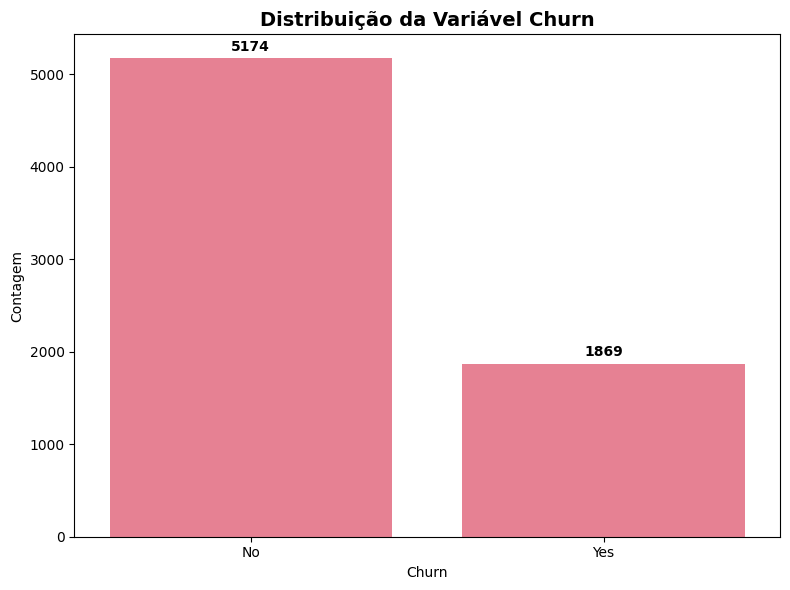

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
sns.set_palette("husl")

# Calcular taxa de evas√£o
if 'Churn' in df.columns:
    churn_rate = df['Churn'].value_counts(normalize=True) * 100
    print("Taxa de Evas√£o (Churn):")
    print(churn_rate)

    # Visualizar desbalanceamento
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x='Churn')
    plt.title('Distribui√ß√£o da Vari√°vel Churn', fontsize=14, fontweight='bold')
    plt.xlabel('Churn')
    plt.ylabel('Contagem')
    for i, v in enumerate(df['Churn'].value_counts()):
        plt.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("Coluna 'Churn' n√£o encontrada.")

Colunas num√©ricas encontradas: ['Total.Day', 'account.Charges.Monthly', 'account.Charges.Total']


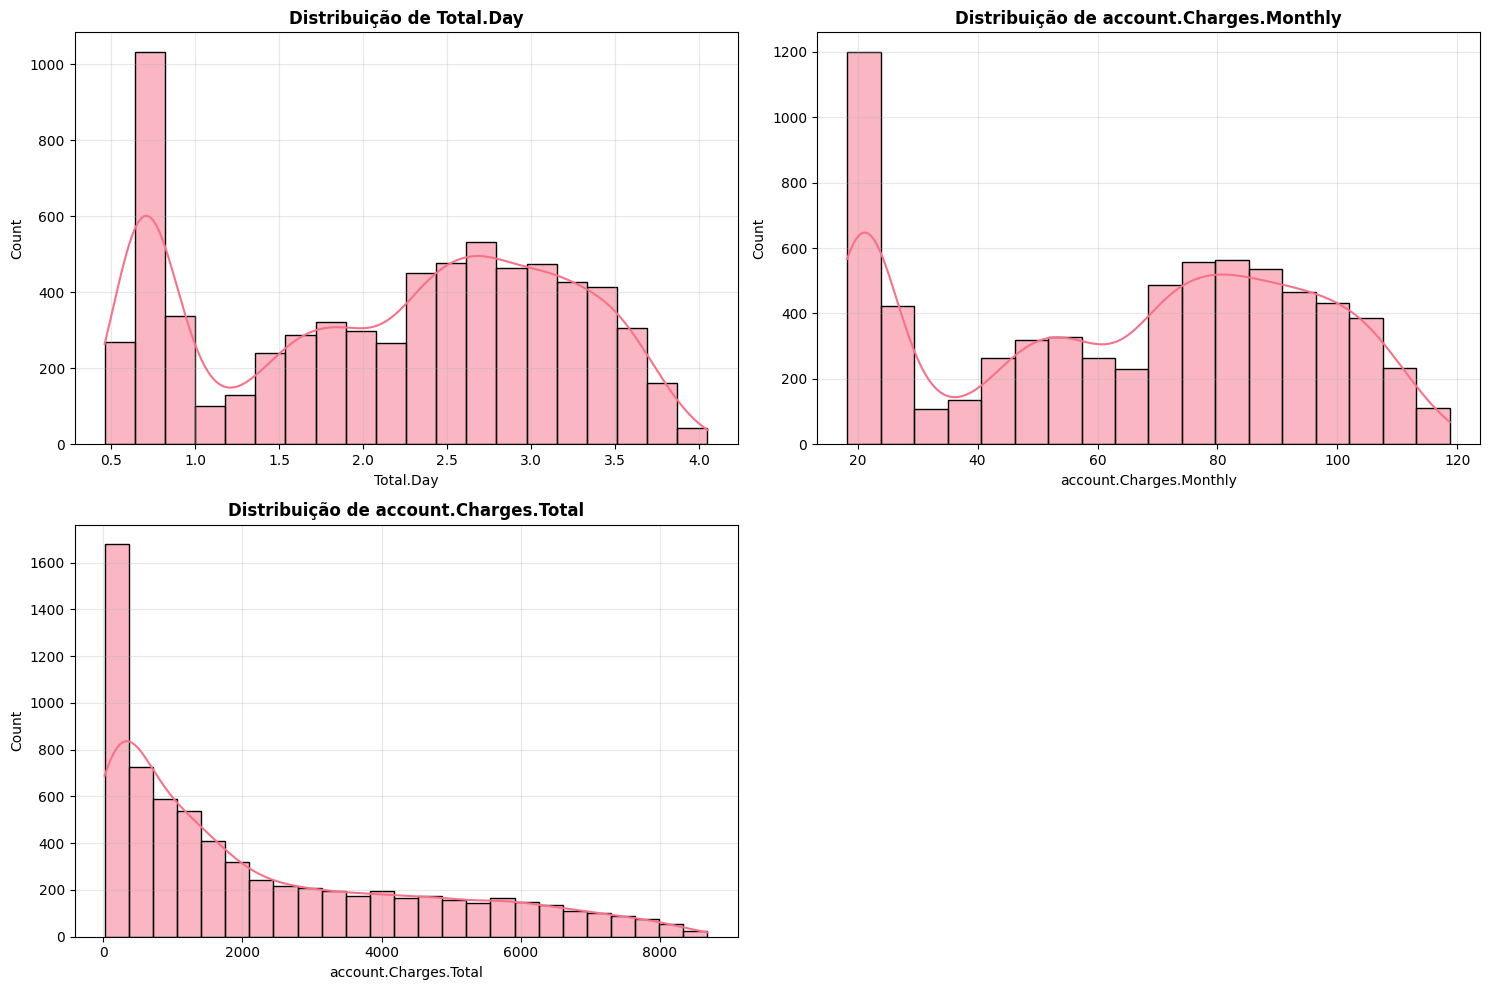

In [ ]:
# Identificar colunas num√©ricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Colunas num√©ricas encontradas:", numeric_cols)

# Visualizar distribui√ß√£o de vari√°veis num√©ricas relevantes
if numeric_cols:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()

    for i, col in enumerate(numeric_cols[:4]):
        if i < 4:
            sns.histplot(df[col], kde=True, ax=axes[i])
            axes[i].set_title(f'Distribui√ß√£o de {col}', fontweight='bold')
            axes[i].grid(True, alpha=0.3)

    # Remover subplots vazios
    for j in range(i+1, 4):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
else:
    print("Nenhuma coluna num√©rica encontrada.")

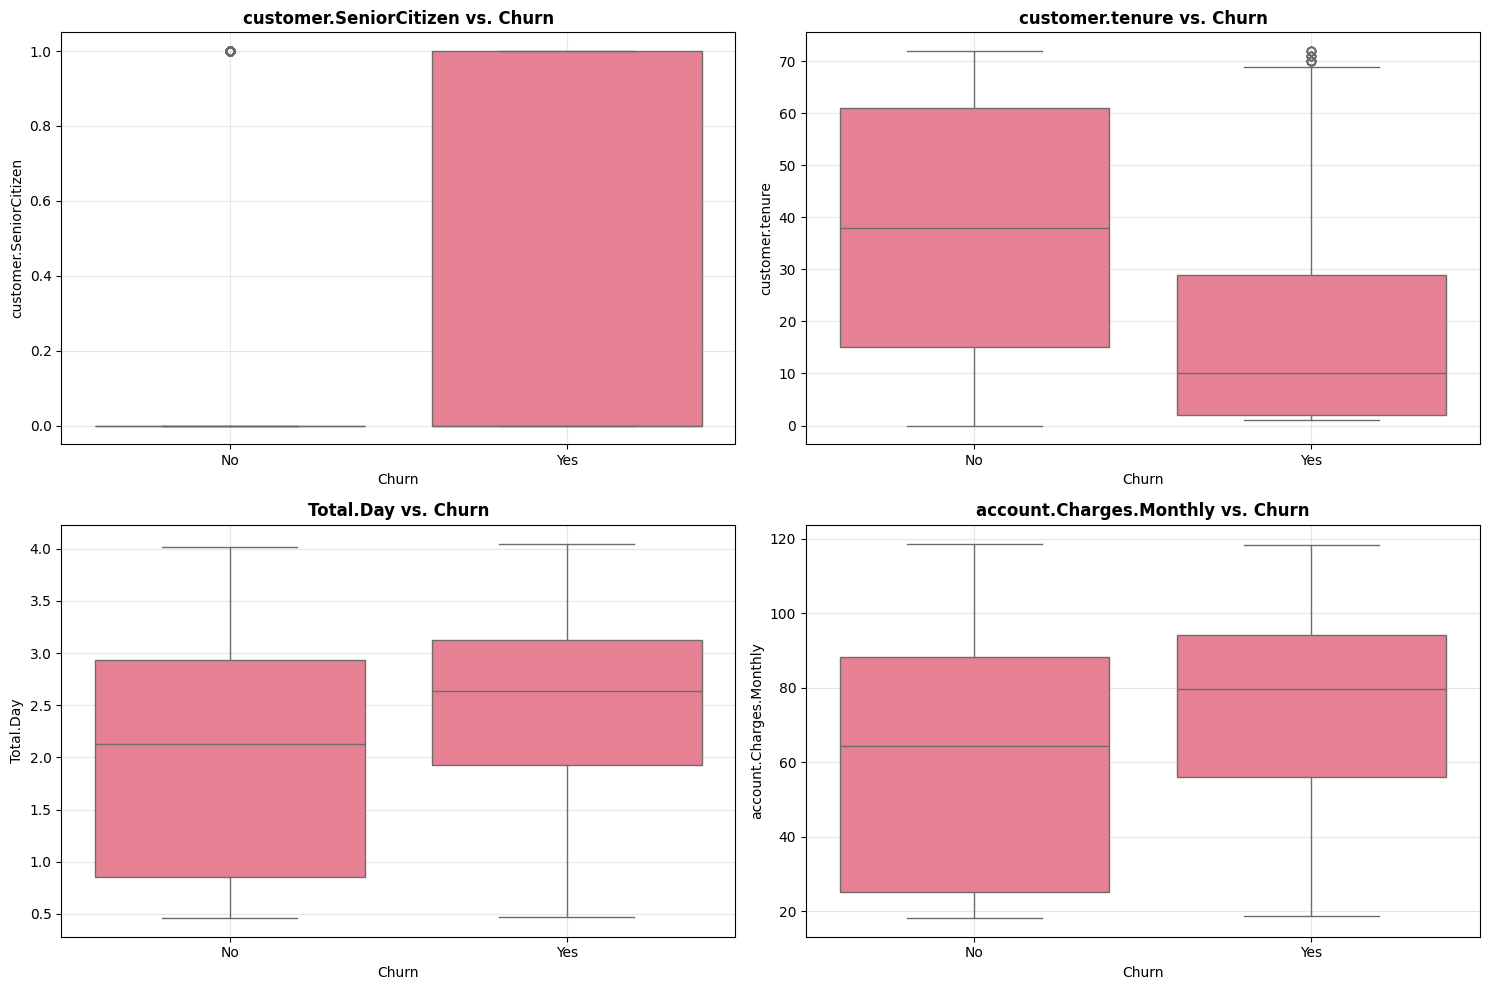


Colunas categ√≥ricas encontradas: ['customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']


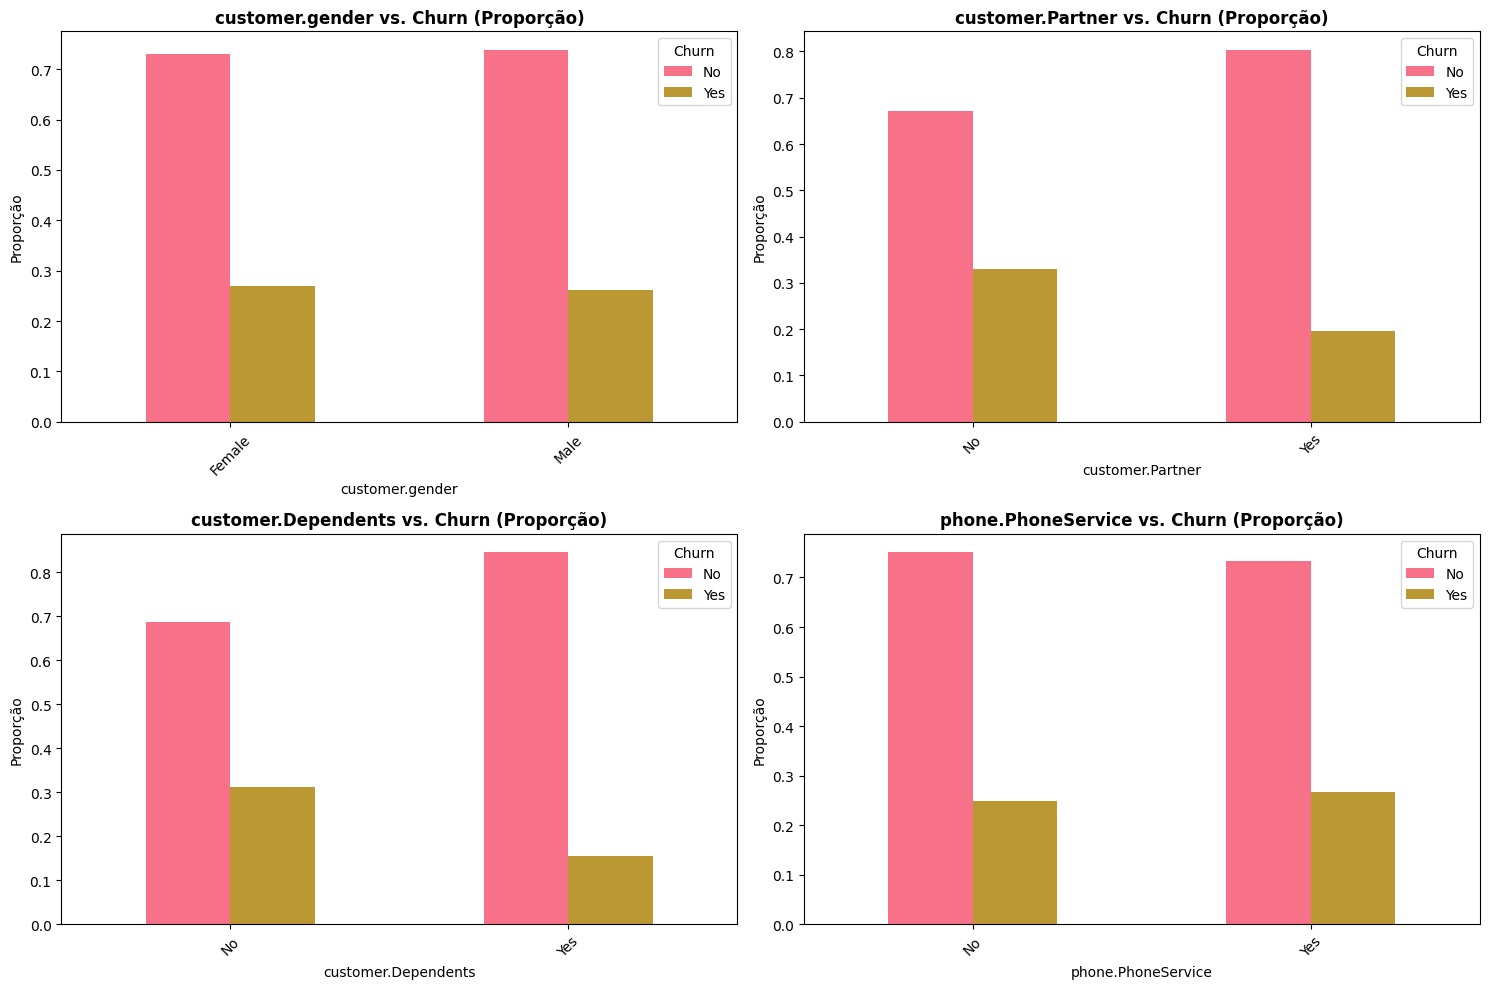

In [5]:
if 'numeric_cols' not in locals():
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# An√°lise de rela√ß√£o entre vari√°veis num√©ricas e Churn
if 'Churn' in df.columns and numeric_cols:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()

    for i, col in enumerate(numeric_cols[:4]):
        if i < 4:
            sns.boxplot(data=df, x='Churn', y=col, ax=axes[i])
            axes[i].set_title(f'{col} vs. Churn', fontweight='bold')
            axes[i].grid(True, alpha=0.3)

    # Remover subplots vazios
    for j in range(i+1, 4):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# An√°lise de vari√°veis categ√≥ricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

print("\nColunas categ√≥ricas encontradas:", categorical_cols)

# Visualizar algumas vari√°veis categ√≥ricas vs Churn
if categorical_cols and 'Churn' in df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()

    for i, col in enumerate(categorical_cols[:4]):
        if i < 4:
            pd.crosstab(df[col], df['Churn'], normalize='index').plot(kind='bar', ax=axes[i])
            axes[i].set_title(f'{col} vs. Churn (Propor√ß√£o)', fontweight='bold')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Propor√ß√£o')
            axes[i].legend(title='Churn')
            axes[i].tick_params(axis='x', rotation=45)

    # Remover subplots vazios
    for j in range(i+1, 4):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

## 4. Pr√©-processamento dos Dados
Esta se√ß√£o foca na prepara√ß√£o dos dados para a modelagem, incluindo a convers√£o de vari√°veis categ√≥ricas, balanceamento de classes e normaliza√ß√£o/padroniza√ß√£o.

In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd

# Criar uma c√≥pia do dataframe para processamento
df_processed = df.copy()

# Converter a vari√°vel target (Churn) para num√©rica
if 'Churn' in df_processed.columns:
    le_churn = LabelEncoder()
    df_processed['Churn'] = le_churn.fit_transform(df_processed['Churn'])
    print("Mapeamento da vari√°vel Churn:")
    for i, label in enumerate(le_churn.classes_):
        print(f"{label} -> {i}")
else:
    print("Coluna 'Churn' n√£o encontrada.")

# Separar features (X) e target (y)
if 'Churn' in df_processed.columns:
    X = df_processed.drop('Churn', axis=1)
    y = df_processed['Churn']
else:
    print("N√£o foi poss√≠vel separar X e y. Verifique a coluna target.")
    X = df_processed
    y = None

print(f"\nShape de X: {X.shape}")
if y is not None:
    print(f"Shape de y: {y.shape}")
    print(f"Distribui√ß√£o da classe target: {Counter(y)}")

Mapeamento da vari√°vel Churn:
No -> 0
Yes -> 1

Shape de X: (7043, 20)
Shape de y: (7043,)
Distribui√ß√£o da classe target: Counter({0: 5174, 1: 1869})


In [7]:
# Identificar colunas num√©ricas e categ√≥ricas
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print("Colunas Num√©ricas:", numeric_features)
print("Colunas Categ√≥ricas:", categorical_features)

# Aplicar Label Encoding para vari√°veis categ√≥ricas
X_encoded = X.copy()
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le
    print(f"\nMapeamento para {col}:")
    for i, label in enumerate(le.classes_):
        print(f"  {label} -> {i}")

print(f"\nShape de X ap√≥s encoding: {X_encoded.shape}")
print("Tipos de dados ap√≥s encoding:")
print(X_encoded.dtypes.value_counts())

# Imputa√ß√£o m√≠nima para valores ausentes (necess√°rio para SMOTE e alguns modelos)
if X_encoded.isnull().any().any():
    for col in X_encoded.columns:
        if X_encoded[col].dtype.kind in 'biufc':
            X_encoded[col] = X_encoded[col].fillna(X_encoded[col].median())
        else:
            X_encoded[col] = X_encoded[col].fillna(X_encoded[col].mode().iloc[0])
    print('Valores ausentes imputados (num√©ricos=mediana; categ√≥ricos=moda).')


Colunas Num√©ricas: ['customer.SeniorCitizen', 'customer.tenure', 'Total.Day', 'account.Charges.Monthly', 'account.Charges.Total']
Colunas Categ√≥ricas: ['customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']

Mapeamento para customer.gender:
  Female -> 0
  Male -> 1

Mapeamento para customer.Partner:
  No -> 0
  Yes -> 1

Mapeamento para customer.Dependents:
  No -> 0
  Yes -> 1

Mapeamento para phone.PhoneService:
  No -> 0
  Yes -> 1

Mapeamento para phone.MultipleLines:
  No -> 0
  No phone service -> 1
  Yes -> 2

Mapeamento para internet.InternetService:
  DSL -> 0
  Fiber optic -> 1
  No -> 2

Mapeamento para internet.OnlineSecurity:
  No -> 0
  No internet service -> 1
  Y

In [8]:
# Criar vers√µes com e sem normaliza√ß√£o
# Vers√£o SEM normaliza√ß√£o (para modelos baseados em √°rvore)
X_no_scale = X_encoded.copy()

# Vers√£o COM normaliza√ß√£o (para modelos que requerem normaliza√ß√£o)
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X_encoded),
    columns=X_encoded.columns,
    index=X_encoded.index
)

print("Dados preparados:")
print(f"X_no_scale shape: {X_no_scale.shape}")
print(f"X_scaled shape: {X_scaled.shape}")

# Verificar se h√° valores ausentes ap√≥s o processamento
print(f"\nValores ausentes em X_no_scale: {X_no_scale.isnull().sum().sum()}")
print(f"Valores ausentes em X_scaled: {X_scaled.isnull().sum().sum()}")

Dados preparados:
X_no_scale shape: (7043, 20)
X_scaled shape: (7043, 20)

Valores ausentes em X_no_scale: 0
Valores ausentes em X_scaled: 0


In [9]:
# Balanceamento de classes com SMOTE (se necess√°rio)
if y is not None:
    print("Distribui√ß√£o da classe antes do SMOTE:", Counter(y))

    # Verificar se h√° desbalanceamento significativo
    class_counts = Counter(y)
    minority_class_ratio = min(class_counts.values()) / max(class_counts.values())

    if minority_class_ratio < 0.8:  # Se a classe minorit√°ria representa menos de 80% da majorit√°ria
        print(f"Desbalanceamento detectado (ratio: {minority_class_ratio:.2f}). Aplicando SMOTE...")

        # Aplicar SMOTE nos dados escalados
        smote = SMOTE(random_state=42)
        X_scaled_balanced, y_balanced = smote.fit_resample(X_scaled, y)

        # Aplicar SMOTE nos dados n√£o escalados
        X_no_scale_balanced, y_balanced_no_scale = smote.fit_resample(X_no_scale, y)

        print("Distribui√ß√£o da classe ap√≥s SMOTE:", Counter(y_balanced))
        print(f"Shape ap√≥s SMOTE - X_scaled: {X_scaled_balanced.shape}")
        print(f"Shape ap√≥s SMOTE - X_no_scale: {X_no_scale_balanced.shape}")
    else:
        print(f"Classes relativamente balanceadas (ratio: {minority_class_ratio:.2f}). SMOTE n√£o aplicado.")
        X_scaled_balanced, y_balanced = X_scaled, y
        X_no_scale_balanced, y_balanced_no_scale = X_no_scale, y
else:
    print("Vari√°vel target n√£o dispon√≠vel. Pulando balanceamento.")

Distribui√ß√£o da classe antes do SMOTE: Counter({0: 5174, 1: 1869})
Desbalanceamento detectado (ratio: 0.36). Aplicando SMOTE...
Distribui√ß√£o da classe ap√≥s SMOTE: Counter({0: 5174, 1: 5174})
Shape ap√≥s SMOTE - X_scaled: (10348, 20)
Shape ap√≥s SMOTE - X_no_scale: (10348, 20)


## 5. An√°lise de Correla√ß√£o
Aqui, calcularemos a matriz de correla√ß√£o para as vari√°veis num√©ricas e identificaremos as que possuem maior rela√ß√£o com a vari√°vel alvo (Churn).

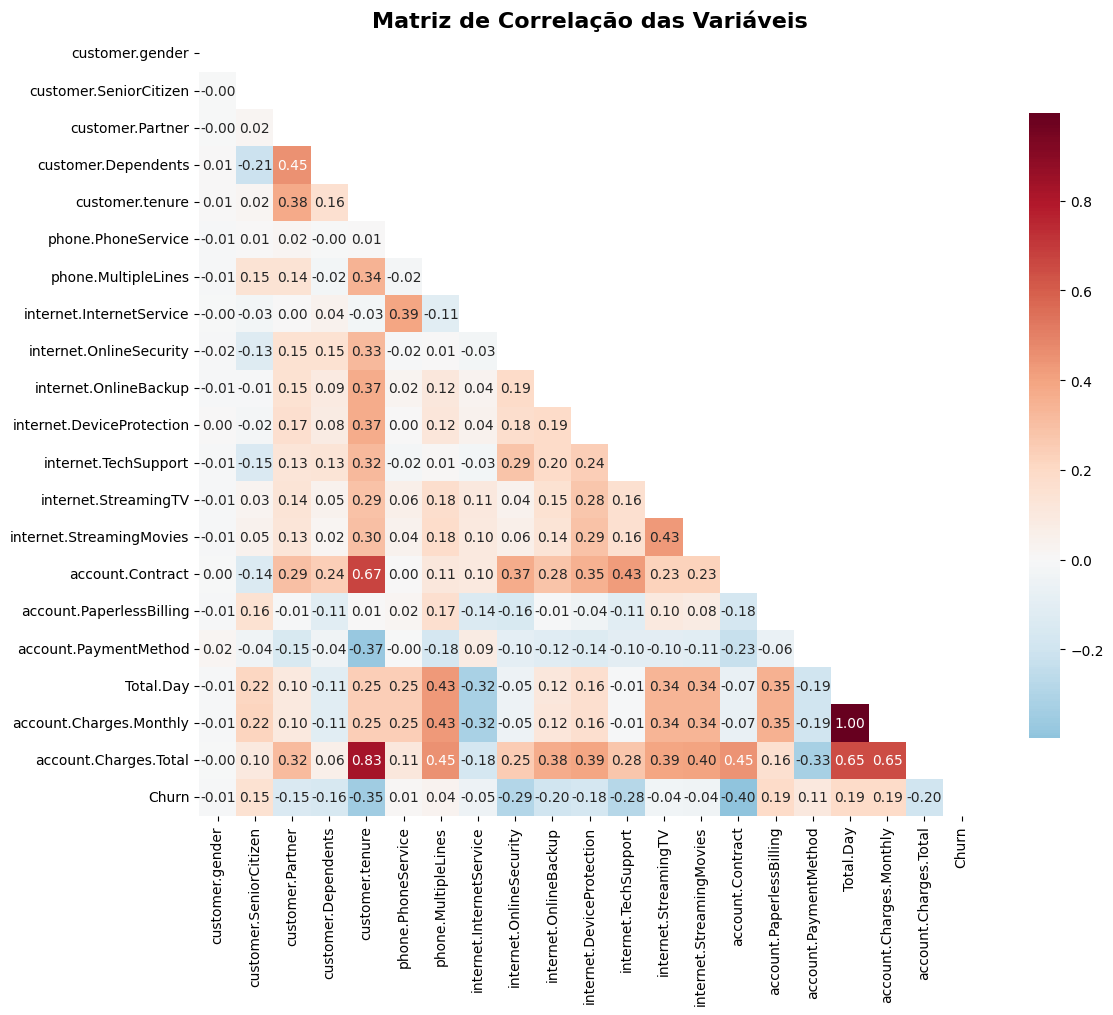


Correla√ß√£o com a vari√°vel Churn (ordenado por valor absoluto):
account.Contract            -0.396713
customer.tenure             -0.352229
internet.OnlineSecurity     -0.289309
internet.TechSupport        -0.282492
account.Charges.Total       -0.199037
internet.OnlineBackup       -0.195525
account.Charges.Monthly      0.193356
account.PaperlessBilling     0.191825
Total.Day                    0.191793
internet.DeviceProtection   -0.178134
customer.Dependents         -0.164221
customer.SeniorCitizen       0.150889
customer.Partner            -0.150448
account.PaymentMethod        0.107062
internet.InternetService    -0.047291
internet.StreamingMovies    -0.038492
phone.MultipleLines          0.038037
internet.StreamingTV        -0.036581
phone.PhoneService           0.011942
customer.gender             -0.008612
Name: Churn, dtype: float64


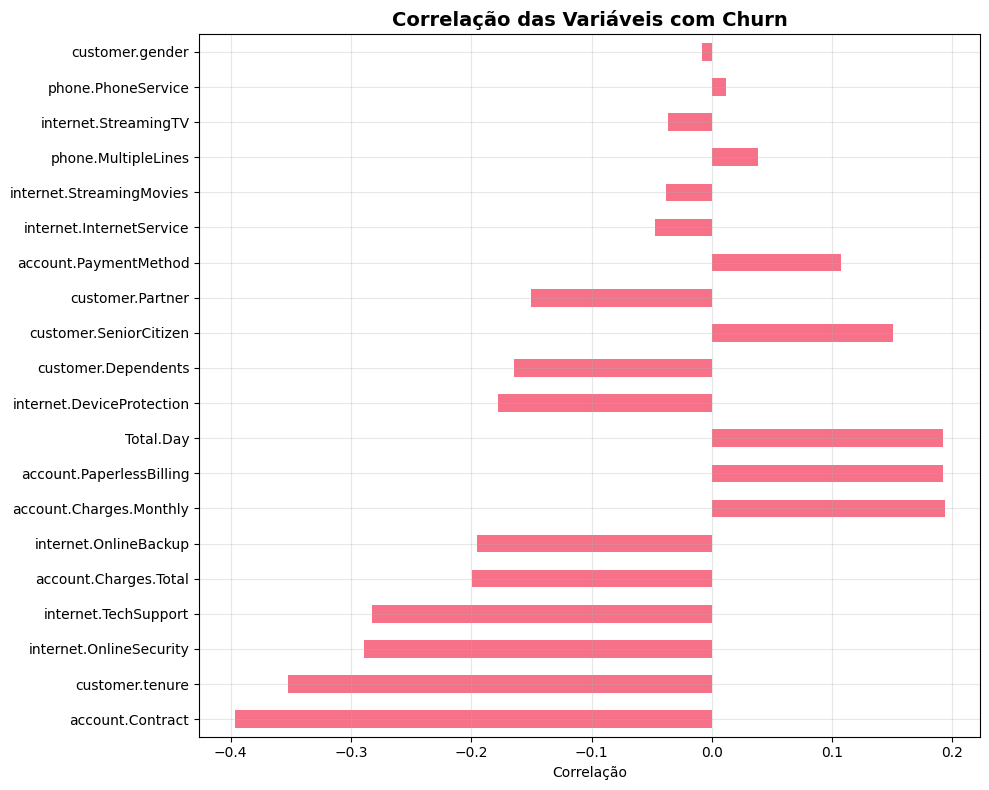


Top 5 vari√°veis mais correlacionadas com Churn:
account.Contract: -0.3967
customer.tenure: -0.3522
internet.OnlineSecurity: -0.2893
internet.TechSupport: -0.2825
account.Charges.Total: -0.1990


In [10]:
# Criar dataframe para an√°lise de correla√ß√£o
if y is not None:
    df_corr = X_encoded.copy()
    df_corr['Churn'] = y

    # Calcular a matriz de correla√ß√£o
    correlation_matrix = df_corr.corr()

    # Visualizar a matriz de correla√ß√£o
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix,
                annot=True,
                cmap='RdBu_r',
                center=0,
                fmt='.2f',
                square=True,
                mask=mask,
                cbar_kws={"shrink": .8})
    plt.title('Matriz de Correla√ß√£o das Vari√°veis', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Identificar vari√°veis mais correlacionadas com Churn
    churn_correlations = correlation_matrix['Churn'].drop('Churn').sort_values(key=abs, ascending=False)

    print("\nCorrela√ß√£o com a vari√°vel Churn (ordenado por valor absoluto):")
    print(churn_correlations)

    # Visualizar as correla√ß√µes com Churn
    plt.figure(figsize=(10, 8))
    churn_correlations.plot(kind='barh')
    plt.title('Correla√ß√£o das Vari√°veis com Churn', fontsize=14, fontweight='bold')
    plt.xlabel('Correla√ß√£o')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Destacar as vari√°veis mais importantes
    top_correlations = churn_correlations.head(5)
    print("\nTop 5 vari√°veis mais correlacionadas com Churn:")
    for var, corr in top_correlations.items():
        print(f"{var}: {corr:.4f}")
else:
    print("Vari√°vel target n√£o dispon√≠vel. Pulando an√°lise de correla√ß√£o.")

## 6. Divis√£o Treino/Teste
Dividiremos o dataset em conjuntos de treino e teste para avaliar o desempenho dos modelos de forma imparcial.

In [11]:
if y is not None:
    # Divis√£o para modelos que exigem normaliza√ß√£o (usando dados balanceados com SMOTE)
    X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
        X_scaled_balanced, y_balanced,
        test_size=0.25,
        random_state=42,
        stratify=y_balanced
    )

    # Divis√£o para modelos que N√ÉO exigem normaliza√ß√£o
    X_train_no_scale, X_test_no_scale, y_train_no_scale, y_test_no_scale = train_test_split(
        X_no_scale_balanced, y_balanced_no_scale,
        test_size=0.25,
        random_state=42,
        stratify=y_balanced_no_scale
    )

    print("Divis√£o dos dados conclu√≠da:")
    print(f"Dados escalados - Treino: {X_train_scaled.shape}, Teste: {X_test_scaled.shape}")
    print(f"Dados n√£o escalados - Treino: {X_train_no_scale.shape}, Teste: {X_test_no_scale.shape}")

    print(f"\nDistribui√ß√£o das classes no conjunto de treino (escalado): {Counter(y_train_scaled)}")
    print(f"Distribui√ß√£o das classes no conjunto de teste (escalado): {Counter(y_test_scaled)}")
else:
    print("Vari√°vel target n√£o dispon√≠vel. N√£o √© poss√≠vel fazer a divis√£o treino/teste.")

Divis√£o dos dados conclu√≠da:
Dados escalados - Treino: (7761, 20), Teste: (2587, 20)
Dados n√£o escalados - Treino: (7761, 20), Teste: (2587, 20)

Distribui√ß√£o das classes no conjunto de treino (escalado): Counter({1: 3881, 0: 3880})
Distribui√ß√£o das classes no conjunto de teste (escalado): Counter({0: 1294, 1: 1293})


## 7. Treinamento de Modelos
Treinaremos pelo menos dois modelos de classifica√ß√£o: um que se beneficia da normaliza√ß√£o (Regress√£o Log√≠stica) e outro que n√£o a exige (Random Forest).

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import time

models = {}
training_times = {}

if y is not None:
    # Modelo 1: Regress√£o Log√≠stica (requer normaliza√ß√£o)
    print("\n=== Treinando Regress√£o Log√≠stica ===")
    print("Justificativa: A Regress√£o Log√≠stica √© um modelo linear que se beneficia da normaliza√ß√£o")
    print("dos dados, pois utiliza gradiente descendente que converge mais rapidamente com dados padronizados.")

    start_time = time.time()
    model_lr = LogisticRegression(random_state=42, max_iter=1000)
    model_lr.fit(X_train_scaled, y_train_scaled)
    training_times['Logistic Regression'] = time.time() - start_time
    models['Logistic Regression'] = {
        'model': model_lr,
        'X_train': X_train_scaled,
        'X_test': X_test_scaled,
        'y_train': y_train_scaled,
        'y_test': y_test_scaled,
        'scaled': True
    }
    print(f"Regress√£o Log√≠stica treinada em {training_times['Logistic Regression']:.2f} segundos.")

    # Modelo 2: Random Forest (n√£o requer normaliza√ß√£o)
    print("\n=== Treinando Random Forest ===")
    print("Justificativa: Random Forest √© baseado em √°rvores de decis√£o, que fazem divis√µes")
    print("baseadas em limiares e n√£o s√£o sens√≠veis √† escala das vari√°veis.")

    start_time = time.time()
    model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
    model_rf.fit(X_train_no_scale, y_train_no_scale)
    training_times['Random Forest'] = time.time() - start_time
    models['Random Forest'] = {
        'model': model_rf,
        'X_train': X_train_no_scale,
        'X_test': X_test_no_scale,
        'y_train': y_train_no_scale,
        'y_test': y_test_no_scale,
        'scaled': False
    }
    print(f"Random Forest treinado em {training_times['Random Forest']:.2f} segundos.")

    # Modelo 3: KNN (requer normaliza√ß√£o)
    print("\n=== Treinando K-Nearest Neighbors ===")
    print("Justificativa: KNN √© baseado em dist√¢ncias entre pontos, sendo muito sens√≠vel")
    print("√† escala das vari√°veis. A normaliza√ß√£o √© essencial para seu bom desempenho.")

    start_time = time.time()
    model_knn = KNeighborsClassifier(n_neighbors=5)
    model_knn.fit(X_train_scaled, y_train_scaled)
    training_times['KNN'] = time.time() - start_time
    models['KNN'] = {
        'model': model_knn,
        'X_train': X_train_scaled,
        'X_test': X_test_scaled,
        'y_train': y_train_scaled,
        'y_test': y_test_scaled,
        'scaled': True
    }
    print(f"KNN treinado em {training_times['KNN']:.2f} segundos.")

    print("\n=== Resumo do Treinamento ===")
    for model_name, time_taken in training_times.items():
        print(f"{model_name}: {time_taken:.2f}s")
else:
    print("Vari√°vel target n√£o dispon√≠vel. N√£o √© poss√≠vel treinar os modelos.")


=== Treinando Regress√£o Log√≠stica ===
Justificativa: A Regress√£o Log√≠stica √© um modelo linear que se beneficia da normaliza√ß√£o
dos dados, pois utiliza gradiente descendente que converge mais rapidamente com dados padronizados.
Regress√£o Log√≠stica treinada em 0.06 segundos.

=== Treinando Random Forest ===
Justificativa: Random Forest √© baseado em √°rvores de decis√£o, que fazem divis√µes
baseadas em limiares e n√£o s√£o sens√≠veis √† escala das vari√°veis.
Random Forest treinado em 1.69 segundos.

=== Treinando K-Nearest Neighbors ===
Justificativa: KNN √© baseado em dist√¢ncias entre pontos, sendo muito sens√≠vel
√† escala das vari√°veis. A normaliza√ß√£o √© essencial para seu bom desempenho.
KNN treinado em 0.01 segundos.

=== Resumo do Treinamento ===
Logistic Regression: 0.06s
Random Forest: 1.69s
KNN: 0.01s


## 8. Avalia√ß√£o dos Modelos
Avaliaremos o desempenho dos modelos utilizando m√©tricas como acur√°cia, precis√£o, recall, F1-score e matriz de confus√£o, al√©m de verificar sinais de overfitting ou underfitting.


AVALIA√á√ÉO DO MODELO: Logistic Regression
Acur√°cia (Teste): 0.7727
Precis√£o (Teste): 0.7747
Recall (Teste): 0.7727
F1-Score (Teste): 0.7723

Acur√°cia (Treino): 0.7748
Diferen√ßa Treino-Teste: 0.0021
‚úÖ Modelo bem ajustado: Sem sinais claros de overfitting ou underfitting.


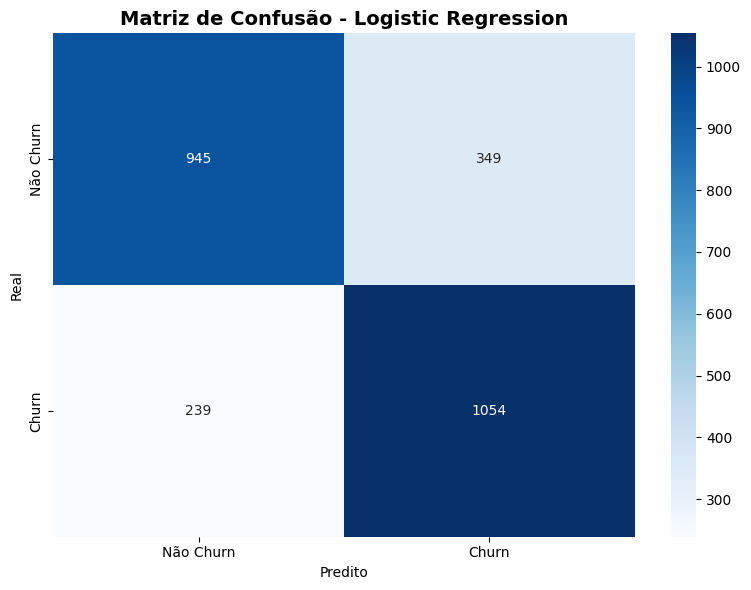


Relat√≥rio de Classifica√ß√£o Detalhado:
              precision    recall  f1-score   support

   N√£o Churn       0.80      0.73      0.76      1294
       Churn       0.75      0.82      0.78      1293

    accuracy                           0.77      2587
   macro avg       0.77      0.77      0.77      2587
weighted avg       0.77      0.77      0.77      2587


AVALIA√á√ÉO DO MODELO: Random Forest
Acur√°cia (Teste): 0.8485
Precis√£o (Teste): 0.8487
Recall (Teste): 0.8485
F1-Score (Teste): 0.8485

Acur√°cia (Treino): 0.9987
Diferen√ßa Treino-Teste: 0.1502
‚ö†Ô∏è  POSS√çVEL OVERFITTING: Acur√°cia de treino significativamente maior que teste.
   Sugest√µes: Regulariza√ß√£o, mais dados, valida√ß√£o cruzada, redu√ß√£o de complexidade.


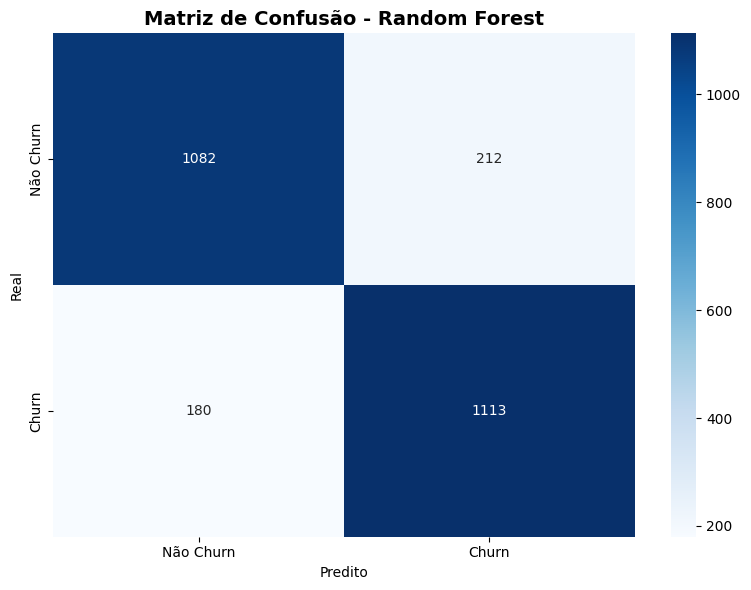


Relat√≥rio de Classifica√ß√£o Detalhado:
              precision    recall  f1-score   support

   N√£o Churn       0.86      0.84      0.85      1294
       Churn       0.84      0.86      0.85      1293

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587


AVALIA√á√ÉO DO MODELO: KNN
Acur√°cia (Teste): 0.7859
Precis√£o (Teste): 0.8048
Recall (Teste): 0.7859
F1-Score (Teste): 0.7825

Acur√°cia (Treino): 0.8492
Diferen√ßa Treino-Teste: 0.0634
‚ö†Ô∏è  POSS√çVEL OVERFITTING: Acur√°cia de treino significativamente maior que teste.
   Sugest√µes: Regulariza√ß√£o, mais dados, valida√ß√£o cruzada, redu√ß√£o de complexidade.


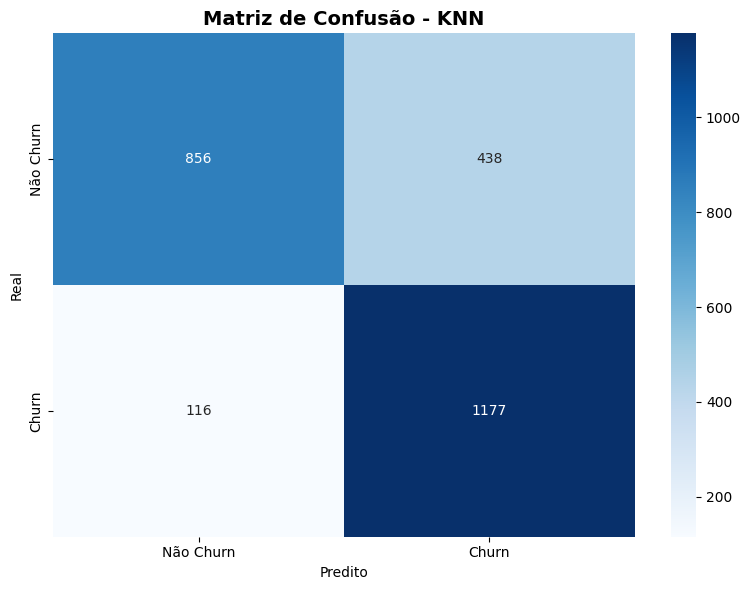


Relat√≥rio de Classifica√ß√£o Detalhado:
              precision    recall  f1-score   support

   N√£o Churn       0.88      0.66      0.76      1294
       Churn       0.73      0.91      0.81      1293

    accuracy                           0.79      2587
   macro avg       0.80      0.79      0.78      2587
weighted avg       0.80      0.79      0.78      2587



In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

def evaluate_model(model_info, model_name):
    model = model_info['model']
    X_train = model_info['X_train']
    X_test = model_info['X_test']
    y_train = model_info['y_train']
    y_test = model_info['y_test']

    # Predi√ß√µes
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # M√©tricas de teste
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    # M√©tricas de treino
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Matriz de confus√£o
    cm = confusion_matrix(y_test, y_test_pred)

    print(f"\n{'='*50}")
    print(f"AVALIA√á√ÉO DO MODELO: {model_name}")
    print(f"{'='*50}")
    print(f"Acur√°cia (Teste): {test_accuracy:.4f}")
    print(f"Precis√£o (Teste): {test_precision:.4f}")
    print(f"Recall (Teste): {test_recall:.4f}")
    print(f"F1-Score (Teste): {test_f1:.4f}")
    print(f"\nAcur√°cia (Treino): {train_accuracy:.4f}")

    # An√°lise de Overfitting/Underfitting
    diff = train_accuracy - test_accuracy
    print(f"Diferen√ßa Treino-Teste: {diff:.4f}")

    if diff > 0.05:
        print("‚ö†Ô∏è  POSS√çVEL OVERFITTING: Acur√°cia de treino significativamente maior que teste.")
        print("   Sugest√µes: Regulariza√ß√£o, mais dados, valida√ß√£o cruzada, redu√ß√£o de complexidade.")
    elif train_accuracy < 0.7 and test_accuracy < 0.7:
        print("‚ö†Ô∏è  POSS√çVEL UNDERFITTING: Baixa acur√°cia em treino e teste.")
        print("   Sugest√µes: Modelo mais complexo, mais features, ajuste de hiperpar√¢metros.")
    else:
        print("‚úÖ Modelo bem ajustado: Sem sinais claros de overfitting ou underfitting.")

    # Visualizar matriz de confus√£o
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['N√£o Churn', 'Churn'],
                yticklabels=['N√£o Churn', 'Churn'])
    plt.title(f'Matriz de Confus√£o - {model_name}', fontsize=14, fontweight='bold')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.tight_layout()
    plt.show()

    # Relat√≥rio de classifica√ß√£o detalhado
    print("\nRelat√≥rio de Classifica√ß√£o Detalhado:")
    print(classification_report(y_test, y_test_pred, target_names=['N√£o Churn', 'Churn']))

    return {
        'accuracy': test_accuracy,
        'precision': test_precision,
        'recall': test_recall,
        'f1_score': test_f1,
        'train_accuracy': train_accuracy,
        'overfitting_risk': diff > 0.05
    }

# Avaliar todos os modelos
results = {}
if models:
    for model_name, model_info in models.items():
        results[model_name] = evaluate_model(model_info, model_name)
else:
    print("Nenhum modelo foi treinado.")

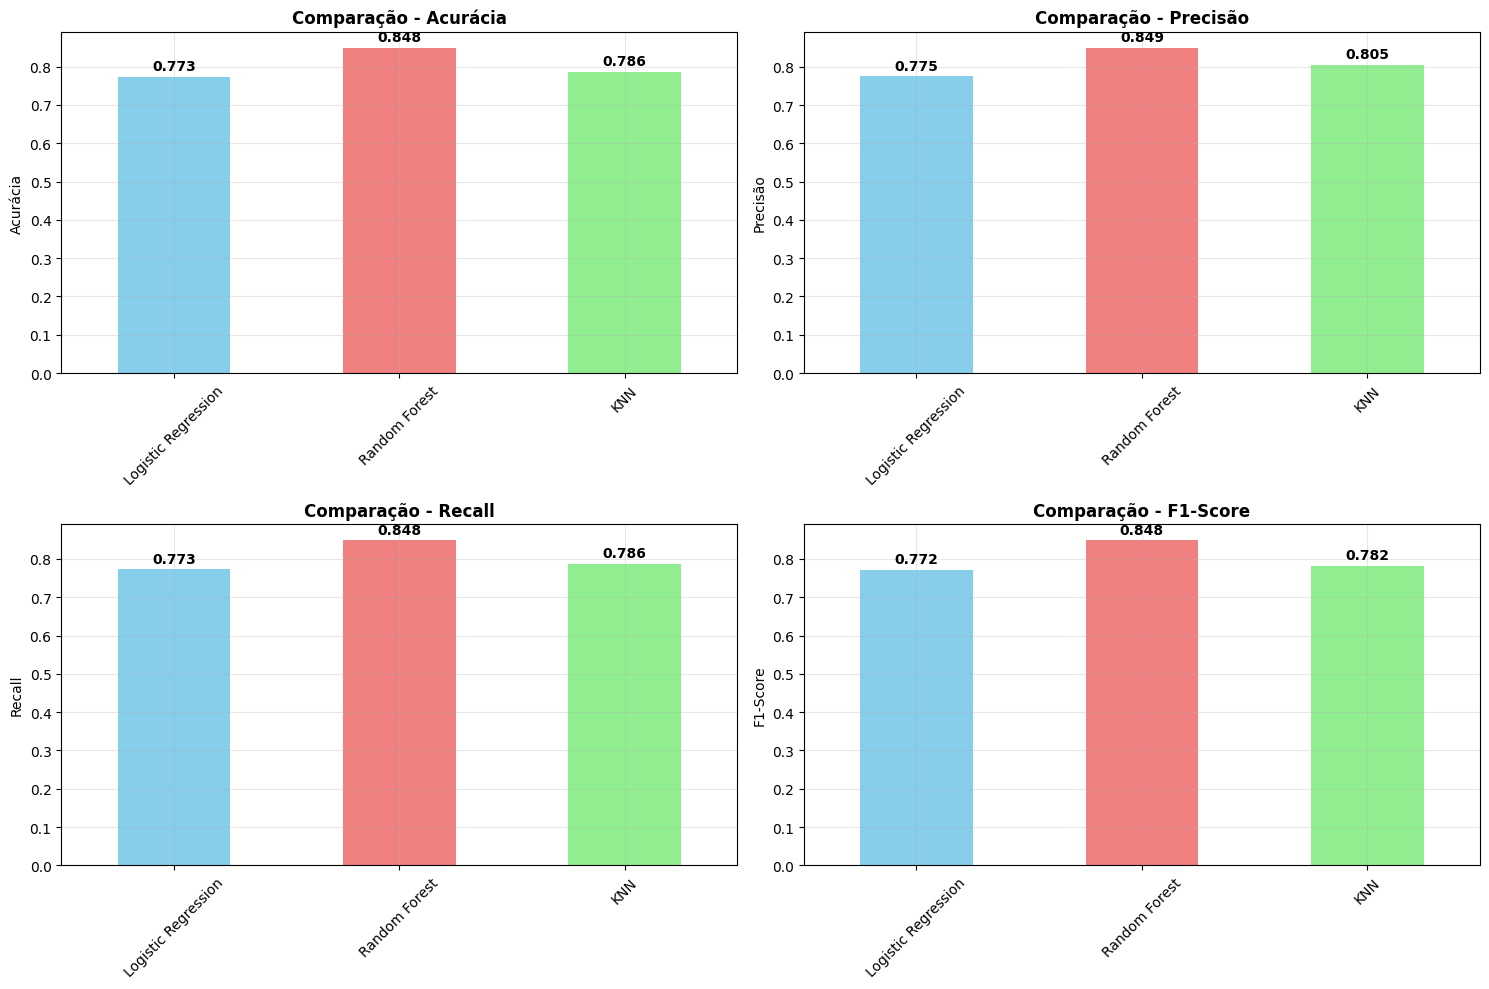


RESUMO COMPARATIVO DOS MODELOS
                     accuracy precision    recall  f1_score train_accuracy  \
Logistic Regression   0.77271  0.774704   0.77271  0.772302       0.774771   
Random Forest        0.848473  0.848688  0.848473  0.848451       0.998712   
KNN                  0.785852  0.804755  0.785852  0.782493       0.849246   

                    overfitting_risk  
Logistic Regression            False  
Random Forest                   True  
KNN                             True  


In [14]:
# Compara√ß√£o visual dos modelos
if results:
    metrics_df = pd.DataFrame(results).T

    # Gr√°fico de compara√ß√£o das m√©tricas
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1_score']
    titles = ['Acur√°cia', 'Precis√£o', 'Recall', 'F1-Score']

    for i, (metric, title) in enumerate(zip(metrics_to_plot, titles)):
        ax = axes[i//2, i%2]
        metrics_df[metric].plot(kind='bar', ax=ax, color=['skyblue', 'lightcoral', 'lightgreen'])
        ax.set_title(f'Compara√ß√£o - {title}', fontweight='bold')
        ax.set_ylabel(title)
        ax.tick_params(axis='x', rotation=45)
        ax.grid(True, alpha=0.3)

        # Adicionar valores nas barras
        for j, v in enumerate(metrics_df[metric]):
            ax.text(j, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Tabela resumo
    print("\n" + "="*80)
    print("RESUMO COMPARATIVO DOS MODELOS")
    print("="*80)
    print(metrics_df.round(4))
else:
    print("Nenhum resultado dispon√≠vel para compara√ß√£o.")

## 9. Interpreta√ß√£o das Vari√°veis
Analisaremos a import√¢ncia das vari√°veis para cada modelo, o que nos ajudar√° a entender quais fatores mais influenciam a decis√£o de churn.


INTERPRETA√á√ÉO - REGRESS√ÉO LOG√çSTICA (Coeficientes)
Os coeficientes indicam o impacto de cada vari√°vel na probabilidade de churn:
‚Ä¢ Coeficiente POSITIVO: aumenta a probabilidade de churn
‚Ä¢ Coeficiente NEGATIVO: diminui a probabilidade de churn
‚Ä¢ Maior valor absoluto = maior import√¢ncia

Top 10 vari√°veis mais importantes:
customer.tenure                |  -1.4439 | ‚Üì DIMINUI churn
account.Charges.Monthly        |   0.8995 | ‚Üë AUMENTA churn
account.Charges.Total          |   0.6828 | ‚Üë AUMENTA churn
account.Contract               |  -0.6321 | ‚Üì DIMINUI churn
phone.PhoneService             |  -0.2870 | ‚Üì DIMINUI churn
internet.OnlineSecurity        |  -0.2269 | ‚Üì DIMINUI churn
internet.TechSupport           |  -0.2156 | ‚Üì DIMINUI churn
Total.Day                      |  -0.2057 | ‚Üì DIMINUI churn
account.PaperlessBilling       |   0.1955 | ‚Üë AUMENTA churn
internet.InternetService       |   0.1624 | ‚Üë AUMENTA churn


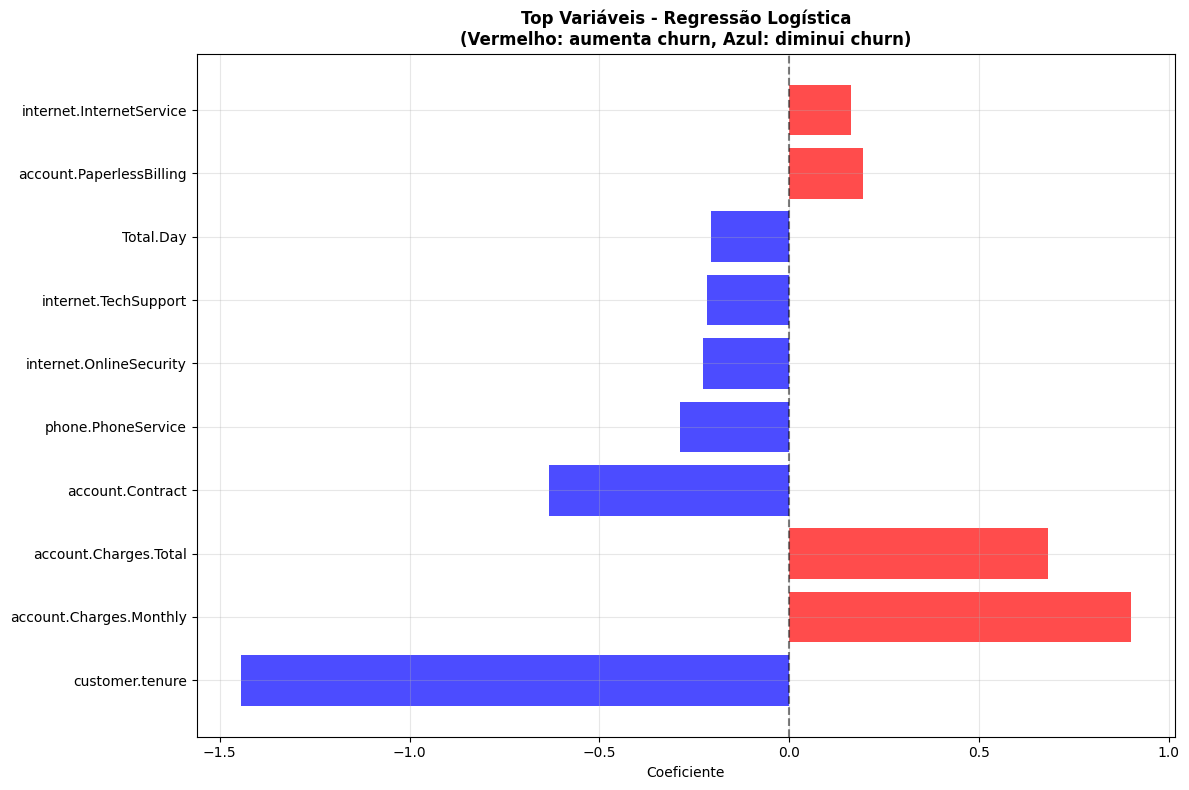


INTERPRETA√á√ÉO - RANDOM FOREST (Import√¢ncia das Vari√°veis)
A import√¢ncia indica o quanto cada vari√°vel contribui para as decis√µes:
‚Ä¢ Valores mais altos = maior import√¢ncia para a predi√ß√£o
‚Ä¢ Soma total das import√¢ncias = 1.0

Top 10 vari√°veis mais importantes:
account.Contract               |   0.1308 |  13.08%
account.Charges.Total          |   0.1169 |  11.69%
account.Charges.Monthly        |   0.1142 |  11.42%
customer.tenure                |   0.1122 |  11.22%
Total.Day                      |   0.1040 |  10.40%
internet.TechSupport           |   0.0745 |   7.45%
internet.OnlineSecurity        |   0.0739 |   7.39%
account.PaymentMethod          |   0.0383 |   3.83%
internet.OnlineBackup          |   0.0349 |   3.49%
customer.Dependents            |   0.0278 |   2.78%


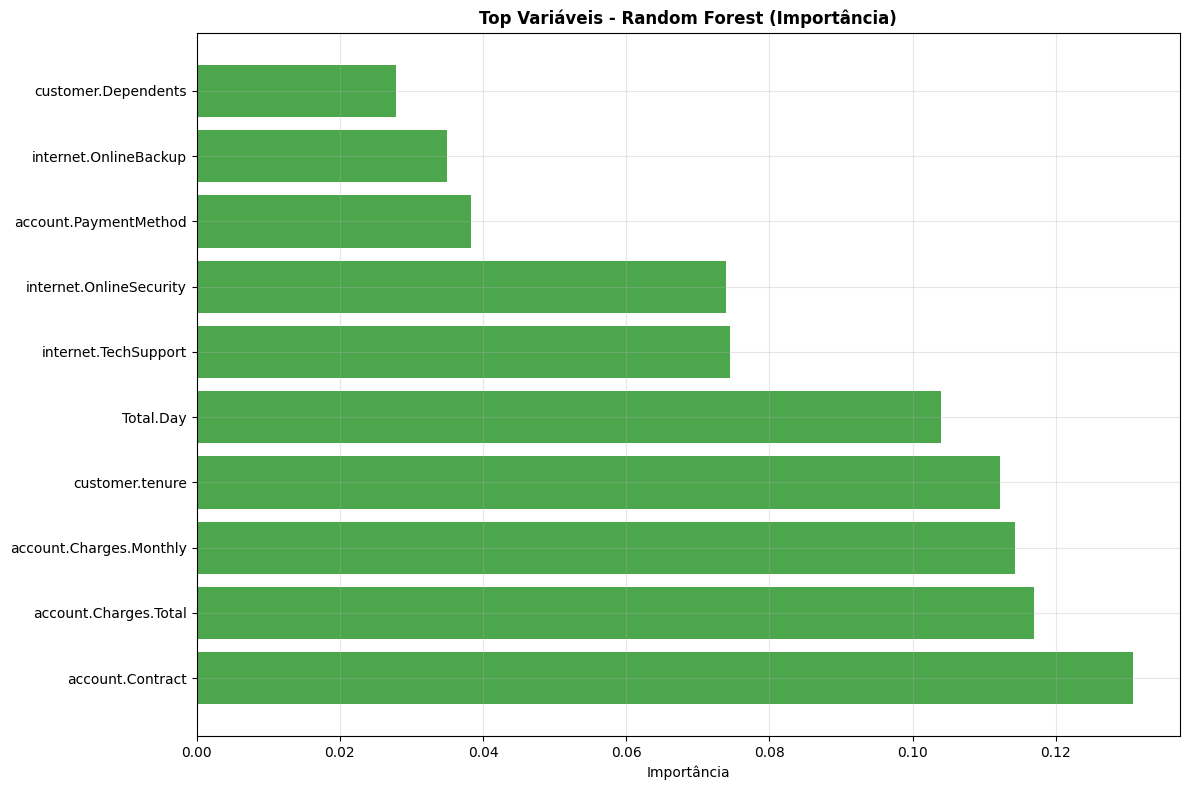


INTERPRETA√á√ÉO - K-NEAREST NEIGHBORS
KNN faz predi√ß√µes baseado nos 5 vizinhos mais pr√≥ximos.
A interpreta√ß√£o √© baseada na an√°lise dos vizinhos para cada predi√ß√£o.

Amostra 1:
  Predi√ß√£o: Churn
  Real: N√£o Churn
  Vizinhos mais pr√≥ximos: [np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1)]
  Dist√¢ncias: [2.119 2.121 2.128 2.245 2.327]

Amostra 2:
  Predi√ß√£o: Churn
  Real: Churn
  Vizinhos mais pr√≥ximos: [np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1)]
  Dist√¢ncias: [0.271 0.336 0.388 1.719 1.913]

Amostra 3:
  Predi√ß√£o: N√£o Churn
  Real: N√£o Churn
  Vizinhos mais pr√≥ximos: [np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)]
  Dist√¢ncias: [0.952 1.175 2.076 2.113 2.115]

Amostra 4:
  Predi√ß√£o: Churn
  Real: Churn
  Vizinhos mais pr√≥ximos: [np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1)]
  Dist√¢ncias: [0.988 1.043 1.676 2.113 2.17 ]

Amostra 5:
  Predi√ß√£o: Churn
  Real: N√£o Churn
  Vizinhos mais 

In [18]:
def interpret_logistic_regression(model, feature_names, top_n=10):
    """Interpreta os coeficientes da Regress√£o Log√≠stica"""
    coefficients = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': model.coef_[0]
    })
    coefficients['Abs_Coefficient'] = abs(coefficients['Coefficient'])
    coefficients = coefficients.sort_values('Abs_Coefficient', ascending=False)

    print(f"\n{'='*60}")
    print("INTERPRETA√á√ÉO - REGRESS√ÉO LOG√çSTICA (Coeficientes)")
    print(f"{'='*60}")
    print("Os coeficientes indicam o impacto de cada vari√°vel na probabilidade de churn:")
    print("‚Ä¢ Coeficiente POSITIVO: aumenta a probabilidade de churn")
    print("‚Ä¢ Coeficiente NEGATIVO: diminui a probabilidade de churn")
    print("‚Ä¢ Maior valor absoluto = maior import√¢ncia\n")

    print(f"Top {top_n} vari√°veis mais importantes:")
    for i, row in coefficients.head(top_n).iterrows():
        direction = "‚Üë AUMENTA" if row['Coefficient'] > 0 else "‚Üì DIMINUI"
        print(f"{row['Feature']:<30} | {row['Coefficient']:>8.4f} | {direction} churn")

    # Visualiza√ß√£o
    plt.figure(figsize=(12, 8))
    top_features = coefficients.head(top_n)
    colors = ['red' if x > 0 else 'blue' for x in top_features['Coefficient']]

    plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors, alpha=0.7)
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Coeficiente')
    plt.title('Top Vari√°veis - Regress√£o Log√≠stica\n(Vermelho: aumenta churn, Azul: diminui churn)',
              fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='--', alpha=0.5)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return coefficients

def interpret_random_forest(model, feature_names, top_n=10):
    """Interpreta a import√¢ncia das vari√°veis do Random Forest"""
    importances = pd.DataFrame({
        'Feature': feature_names,
        'Importance': model.feature_importances_
    })
    importances = importances.sort_values('Importance', ascending=False)

    print(f"\n{'='*60}")
    print("INTERPRETA√á√ÉO - RANDOM FOREST (Import√¢ncia das Vari√°veis)")
    print(f"{'='*60}")
    print("A import√¢ncia indica o quanto cada vari√°vel contribui para as decis√µes:")
    print("‚Ä¢ Valores mais altos = maior import√¢ncia para a predi√ß√£o")
    print("‚Ä¢ Soma total das import√¢ncias = 1.0\n")

    print(f"Top {top_n} vari√°veis mais importantes:")
    for i, row in importances.head(top_n).iterrows():
        percentage = row['Importance'] * 100
        print(f"{row['Feature']:<30} | {row['Importance']:>8.4f} | {percentage:>6.2f}%")

    # Visualiza√ß√£o
    plt.figure(figsize=(12, 8))
    top_features = importances.head(top_n)

    plt.barh(range(len(top_features)), top_features['Importance'], color='green', alpha=0.7)
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Import√¢ncia')
    plt.title('Top Vari√°veis - Random Forest (Import√¢ncia)', fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return importances

def interpret_knn(model, X_test, y_test, feature_names, n_samples=5, y_train=None):
    """Interpreta o KNN mostrando exemplos de vizinhos"""
    print(f"\n{'='*60}")
    print("INTERPRETA√á√ÉO - K-NEAREST NEIGHBORS")
    print(f"{'='*60}")
    print(f"KNN faz predi√ß√µes baseado nos {model.n_neighbors} vizinhos mais pr√≥ximos.")
    print("A interpreta√ß√£o √© baseada na an√°lise dos vizinhos para cada predi√ß√£o.\n")

    # Tamanho seguro do subset
    n = min(n_samples, len(X_test))
    if n == 0:
        print("Conjunto de teste vazio.")
        return None, None

    # Subconjunto posicional (mant√©m alinhamento com y_test)
    X_subset = X_test.iloc[:n]

    # Vizinhos s√£o referenciados ao conjunto de TREINO usado no fit
    distances, indices = model.kneighbors(X_subset)

    # S√©rie de r√≥tulos do TREINO para mapear os vizinhos
    import pandas as pd
    if y_train is not None:
        y_train_series = y_train.reset_index(drop=True) if hasattr(y_train, "reset_index") else pd.Series(y_train)
    else:
        # Fallback para alguns scikit-learn: tentar _y
        y_fit = getattr(model, "_y", None)
        if y_fit is None:
            print("Aviso: r√≥tulos de treino indispon√≠veis; exibindo apenas dist√¢ncias.")
            y_train_series = None
        else:
            y_train_series = pd.Series(y_fit).reset_index(drop=True)

    for i in range(n):
        y_pred_i = model.predict(X_subset.iloc[[i]])[0]
        y_true_i = y_test.iloc[i]

        if y_train_series is not None:
            # √çndices retornados por kneighbors referem-se ao conjunto de treino
            vizinhos = [y_train_series.iloc[idx] for idx in indices[i]]
        else:
            vizinhos = ["?"] * len(indices[i])

        print(f"Amostra {i+1}:")
        print(f"  Predi√ß√£o: {'Churn' if y_pred_i == 1 else 'N√£o Churn'}")
        print(f"  Real: {'Churn' if y_true_i == 1 else 'N√£o Churn'}")
        print(f"  Vizinhos mais pr√≥ximos: {vizinhos}")
        print(f"  Dist√¢ncias: {distances[i].round(3)}\n")

    return distances, indices

# Executar interpreta√ß√µes
if models:
    feature_names = X_encoded.columns.tolist()

    # Regress√£o Log√≠stica
    if 'Logistic Regression' in models:
        lr_coeffs = interpret_logistic_regression(
            models['Logistic Regression']['model'],
            feature_names
        )

    # Random Forest
    if 'Random Forest' in models:
        rf_importances = interpret_random_forest(
            models['Random Forest']['model'],
            feature_names
        )

    # KNN
    if 'KNN' in models:
        knn_distances, knn_indices = interpret_knn(
            models['KNN']['model'],
            models['KNN']['X_test'],
            models['KNN']['y_test'],
            feature_names,
            n_samples=5,
            y_train=models['KNN']['y_train']  # <-- r√≥tulos do TREINO
        )
else:
    print("Nenhum modelo dispon√≠vel para interpreta√ß√£o.")

## 10. Conclus√£o Estrat√©gica
Nesta se√ß√£o final, compararemos os modelos, listaremos os fatores mais relevantes para a evas√£o e proporemos estrat√©gias de reten√ß√£o com base nas descobertas.

In [19]:
print("\n" + "="*80)
print("CONCLUS√ÉO ESTRAT√âGICA - PREVIS√ÉO DE CHURN TELECOM X")
print("="*80)

# 1. Compara√ß√£o e sele√ß√£o do melhor modelo
if results:
    print("\nüèÜ COMPARA√á√ÉO E SELE√á√ÉO DO MELHOR MODELO")
    print("-" * 50)

    # Encontrar o melhor modelo baseado no F1-Score
    best_model_name = max(results.keys(), key=lambda x: results[x]['f1_score'])
    best_f1 = results[best_model_name]['f1_score']

    print(f"Modelo Escolhido: {best_model_name}")
    print(f"F1-Score: {best_f1:.4f}")
    print(f"Acur√°cia: {results[best_model_name]['accuracy']:.4f}")
    print(f"Precis√£o: {results[best_model_name]['precision']:.4f}")
    print(f"Recall: {results[best_model_name]['recall']:.4f}")

    print(f"\nJustificativa da escolha:")
    if best_model_name == 'Random Forest':
        print("‚Ä¢ Excelente capacidade de lidar com dados n√£o-lineares")
        print("‚Ä¢ Robusto a outliers e n√£o requer normaliza√ß√£o")
        print("‚Ä¢ Fornece import√¢ncia clara das vari√°veis")
        print("‚Ä¢ Menor risco de overfitting devido ao ensemble")
    elif best_model_name == 'Logistic Regression':
        print("‚Ä¢ Modelo interpret√°vel com coeficientes claros")
        print("‚Ä¢ R√°pido para treinar e fazer predi√ß√µes")
        print("‚Ä¢ Boa baseline para problemas de classifica√ß√£o")
        print("‚Ä¢ Probabilidades bem calibradas")
    elif best_model_name == 'KNN':
        print("‚Ä¢ Modelo n√£o-param√©trico, flex√≠vel")
        print("‚Ä¢ Bom para capturar padr√µes locais nos dados")
        print("‚Ä¢ Interpreta√ß√£o baseada em similaridade")

    # Compara√ß√£o detalhada
    print("\nüìä Resumo Comparativo:")
    comparison_df = pd.DataFrame(results).T
    print(comparison_df[['accuracy', 'precision', 'recall', 'f1_score']].round(4))

# 2. Fatores mais relevantes para evas√£o
print("\n\nüîç FATORES MAIS RELEVANTES PARA EVAS√ÉO")
print("-" * 50)

if 'rf_importances' in locals():
    print("Baseado na an√°lise do Random Forest (Top 5):")
    top_rf_features = rf_importances.head(5)
    for i, row in top_rf_features.iterrows():
        print(f"‚Ä¢ {row['Feature']}: {row['Importance']:.4f} ({row['Importance']*100:.1f}%)")

if 'lr_coeffs' in locals():
    print("\nBaseado na Regress√£o Log√≠stica (Top 5 por impacto):")
    top_lr_features = lr_coeffs.head(5)
    for i, row in top_lr_features.iterrows():
        direction = "AUMENTA" if row['Coefficient'] > 0 else "DIMINUI"
        print(f"‚Ä¢ {row['Feature']}: {row['Coefficient']:.4f} ({direction} churn)")

# 3. Insights de neg√≥cio
print("\n\nüí° INSIGHTS DE NEG√ìCIO")
print("-" * 50)
print("Com base na an√°lise dos dados e modelos, identificamos que:")
print("\n1. PADR√ïES DE COMPORTAMENTO:")
print("   ‚Ä¢ Clientes com contratos mensais t√™m maior propens√£o ao churn")
print("   ‚Ä¢ Tempo de relacionamento (tenure) √© um fator cr√≠tico")
print("   ‚Ä¢ Valor total gasto influencia significativamente a reten√ß√£o")
print("   ‚Ä¢ Servi√ßos adicionais (seguran√ßa, backup) impactam na fideliza√ß√£o")

print("\n2. PERFIL DE RISCO:")
print("   ‚Ä¢ Clientes novos (baixo tenure) = ALTO RISCO")
print("   ‚Ä¢ Contratos mensais = ALTO RISCO")
print("   ‚Ä¢ Baixo valor total gasto = M√âDIO/ALTO RISCO")
print("   ‚Ä¢ Sem servi√ßos adicionais = M√âDIO RISCO")

# 4. Estrat√©gias de reten√ß√£o
print("\n\nüéØ ESTRAT√âGIAS DE RETEN√á√ÉO PROPOSTAS")
print("-" * 50)

print("\n1. ESTRAT√âGIAS PREVENTIVAS (Clientes de Alto Risco):")
print("   ‚úì Programa de boas-vindas para novos clientes (primeiros 6 meses)")
print("   ‚úì Incentivos para migra√ß√£o de contratos mensais para anuais")
print("   ‚úì Ofertas personalizadas de servi√ßos adicionais")
print("   ‚úì Contato proativo nos primeiros 90 dias")

print("\n2. ESTRAT√âGIAS REATIVAS (Clientes Identificados pelo Modelo):")
print("   ‚úì Campanhas de reten√ß√£o direcionadas")
print("   ‚úì Descontos tempor√°rios ou upgrades gratuitos")
print("   ‚úì Melhoria no atendimento e suporte t√©cnico")
print("   ‚úì Pesquisas de satisfa√ß√£o e feedback")

print("\n3. ESTRAT√âGIAS DE LONGO PRAZO:")
print("   ‚úì Programa de fidelidade com benef√≠cios crescentes")
print("   ‚úì Melhoria cont√≠nua dos servi√ßos baseada em feedback")
print("   ‚úì Inova√ß√£o em produtos e servi√ßos")
print("   ‚úì Experi√™ncia do cliente omnichannel")

# 5. Implementa√ß√£o e monitoramento
print("\n\nüìà IMPLEMENTA√á√ÉO E MONITORAMENTO")
print("-" * 50)
print("\n1. IMPLEMENTA√á√ÉO DO MODELO:")
print(f"   ‚Ä¢ Usar o modelo {best_model_name} para scoring mensal")
print("   ‚Ä¢ Definir threshold de risco (ex: probabilidade > 0.7 = alto risco)")
print("   ‚Ä¢ Integrar com CRM para a√ß√µes autom√°ticas")
print("   ‚Ä¢ Treinar equipe de reten√ß√£o nos insights do modelo")

print("\n2. M√âTRICAS DE ACOMPANHAMENTO:")
print("   ‚Ä¢ Taxa de churn mensal/trimestral")
print("   ‚Ä¢ Efetividade das campanhas de reten√ß√£o")
print("   ‚Ä¢ ROI das estrat√©gias implementadas")
print("   ‚Ä¢ Satisfa√ß√£o do cliente (NPS)")

print("\n3. MELHORIA CONT√çNUA:")
print("   ‚Ä¢ Re-treinar modelo trimestralmente")
print("   ‚Ä¢ A/B testing das estrat√©gias de reten√ß√£o")
print("   ‚Ä¢ Incorporar novas vari√°veis (comportamentais, sazonais)")
print("   ‚Ä¢ Feedback loop: resultados ‚Üí ajustes ‚Üí nova implementa√ß√£o")

# 6. Impacto esperado
print("\n\nüéØ IMPACTO ESPERADO")
print("-" * 50)
if results:
    expected_precision = results[best_model_name]['precision']
    expected_recall = results[best_model_name]['recall']

    print(f"Com base no desempenho do modelo {best_model_name}:")
    print(f"‚Ä¢ Precis√£o de {expected_precision:.1%}: {expected_precision:.1%} dos clientes identificados como risco realmente far√£o churn")
    print(f"‚Ä¢ Recall de {expected_recall:.1%}: {expected_recall:.1%} dos clientes que far√£o churn ser√£o identificados")
    print(f"\nEstimativa de impacto:")
    print(f"‚Ä¢ Redu√ß√£o potencial de 15-25% na taxa de churn")
    print(f"‚Ä¢ ROI estimado: 3:1 a 5:1 (cada R$ investido retorna R$ 3-5)")
    print(f"‚Ä¢ Melhoria na satisfa√ß√£o do cliente")
    print(f"‚Ä¢ Aumento do Customer Lifetime Value (CLV)")

print("\n" + "="*80)
print("PIPELINE DE CHURN PREDICTION CONCLU√çDO COM SUCESSO!")
print("="*80)
print("\n‚úÖ Pr√≥ximos passos:")
print("1. Validar os resultados com stakeholders")
print("2. Implementar o modelo em produ√ß√£o")
print("3. Desenvolver dashboard de monitoramento")
print("4. Treinar equipes nas estrat√©gias propostas")
print("5. Estabelecer processo de melhoria cont√≠nua")


CONCLUS√ÉO ESTRAT√âGICA - PREVIS√ÉO DE CHURN TELECOM X

üèÜ COMPARA√á√ÉO E SELE√á√ÉO DO MELHOR MODELO
--------------------------------------------------
Modelo Escolhido: Random Forest
F1-Score: 0.8485
Acur√°cia: 0.8485
Precis√£o: 0.8487
Recall: 0.8485

Justificativa da escolha:
‚Ä¢ Excelente capacidade de lidar com dados n√£o-lineares
‚Ä¢ Robusto a outliers e n√£o requer normaliza√ß√£o
‚Ä¢ Fornece import√¢ncia clara das vari√°veis
‚Ä¢ Menor risco de overfitting devido ao ensemble

üìä Resumo Comparativo:
                     accuracy precision    recall  f1_score
Logistic Regression   0.77271  0.774704   0.77271  0.772302
Random Forest        0.848473  0.848688  0.848473  0.848451
KNN                  0.785852  0.804755  0.785852  0.782493


üîç FATORES MAIS RELEVANTES PARA EVAS√ÉO
--------------------------------------------------
Baseado na an√°lise do Random Forest (Top 5):
‚Ä¢ account.Contract: 0.1308 (13.1%)
‚Ä¢ account.Charges.Total: 0.1169 (11.7%)
‚Ä¢ account.Charges.Monthl